In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ml-course/tweets.csv')

In [4]:
# Read the data
# df_orig = pd.read_csv('tweets.csv')
df_orig = df.copy()
df_orig.head()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,Country,Place (as appears on Bio),Profile picture,Followers,Following,Listed,Tweet language (ISO 639-1),Tweet Url
0,725975413462163456,2016-04-29,09:10,kiko,YungKeeks21,☀️The Land of Enchantment☀ ️BYU. I used to pun...,RT @DILLONFRANCIS: Dude @CalvinHarris fucking ...,NaN,131.0,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/7259290195...,557.0,221.0,1.0,en,http://www.twitter.com/YungKeeks21/status/7259...
1,725975412141084673,2016-04-29,09:10,get high-class item,high_item,NaN,Apple iPod classic 7th Generation Black (160 G...,NaN,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/7201085111...,9.0,40.0,3.0,en,http://www.twitter.com/high_item/status/725975...
2,725975411893538816,2016-04-29,09:10,ゲームアプリ情報！,GameAppxx,NaN,iPhone用 有料アプリ ゲーム部門 第48位\nRadiation Island\nht...,NaN,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/6664504470...,205.0,NaN,17.0,es,http://www.twitter.com/GameAppxx/status/725975...
3,725975411839107072,2016-04-29,09:10,Gaigko Youklu,Gaigko__Youklu,"Music,sports,photografy,travel,shopping,internet",Apple iPhone 6 - 16GB - Gold (Sprint) Clean Se...,NaN,NaN,53.958,-1.083,GB,"New York, USA",http://pbs.twimg.com/profile_images/7127102402...,107.0,NaN,1661.0,en,http://www.twitter.com/Gaigko__Youklu/status/7...
4,725975411117547521,2016-04-29,09:10,らら,rr_rr_rara,鍵は気まぐれ。鍵付きじゃない時は無言フォローじゃなく、一言かけてくださると嬉しいです(_)無...,@anko_apple_9 コスプレしますよー💓このキャラしてます💓 https://t.c...,NaN,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/7259247357...,621.0,752.0,55.0,es,http://www.twitter.com/rr_rr_rara/status/72597...


In [5]:
df_en = df_orig[df_orig['Tweet language (ISO 639-1)'] == 'en']
print(len(df_en))
print(df_en.columns)

118355
Index(['Tweet Id', 'Date', 'Hour', 'User Name', 'Nickname', 'Bio',
       'Tweet content', 'Favs', 'RTs', 'Latitude', 'Longitude', 'Country',
       'Place (as appears on Bio)', 'Profile picture', 'Followers',
       'Following', 'Listed', 'Tweet language (ISO 639-1)', 'Tweet Url'],
      dtype='object')


In [6]:
# Feature selection
df_clean = df_en.drop(['Tweet Id','User Name','Nickname','Bio','Latitude','Longitude','Place (as appears on Bio)','Profile picture','Tweet language (ISO 639-1)','Tweet Url'], axis=1)
df_clean.info()
print(len(df_clean))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118355 entries, 0 to 170481
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           118355 non-null  object 
 1   Hour           118355 non-null  object 
 2   Tweet content  118355 non-null  object 
 3   Favs           4241 non-null    float64
 4   RTs            51167 non-null   float64
 5   Country        43732 non-null   object 
 6   Followers      117200 non-null  float64
 7   Following      103619 non-null  float64
 8   Listed         103147 non-null  float64
dtypes: float64(5), object(4)
memory usage: 9.0+ MB
118355


In [7]:
df_clean.rename(columns={'Tweet content':'Tweet','RTs':'Retweets'}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118355 entries, 0 to 170481
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       118355 non-null  object 
 1   Hour       118355 non-null  object 
 2   Tweet      118355 non-null  object 
 3   Favs       4241 non-null    float64
 4   Retweets   51167 non-null   float64
 5   Country    43732 non-null   object 
 6   Followers  117200 non-null  float64
 7   Following  103619 non-null  float64
 8   Listed     103147 non-null  float64
dtypes: float64(5), object(4)
memory usage: 9.0+ MB


In [ ]:
# Data cleaning
df_clean.isnull().sum()

Date              0
Hour              0
Tweet             0
Favs         114114
Retweets      67188
Country       74623
Followers      1155
Following     14736
Listed        15208
dtype: int64

In [8]:
df_clean['Date'].value_counts()

2016-04-28    62666
2016-04-29    55689
Name: Date, dtype: int64

Text(0.5, 1.0, 'Hour: Hour distribution')

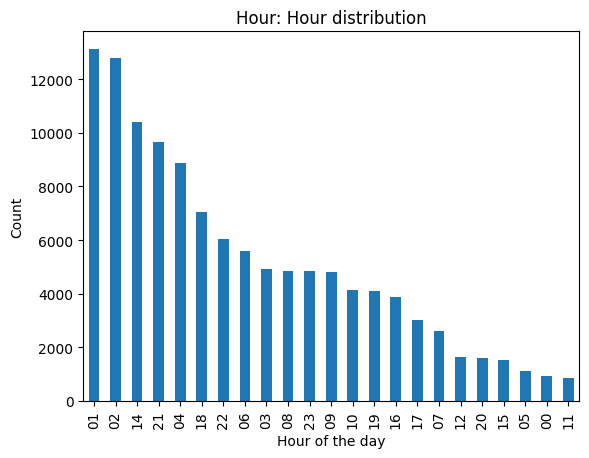

In [ ]:
df_clean['Hour'].apply(lambda x: x.split(':')[0]).value_counts(sort=True).plot(kind='bar')
plt.xlabel('Hour of the day')
plt.ylabel('Count') 
plt.title('Hour: Hour distribution')

Text(0.5, 1.0, 'Hour: Minutes distribution')

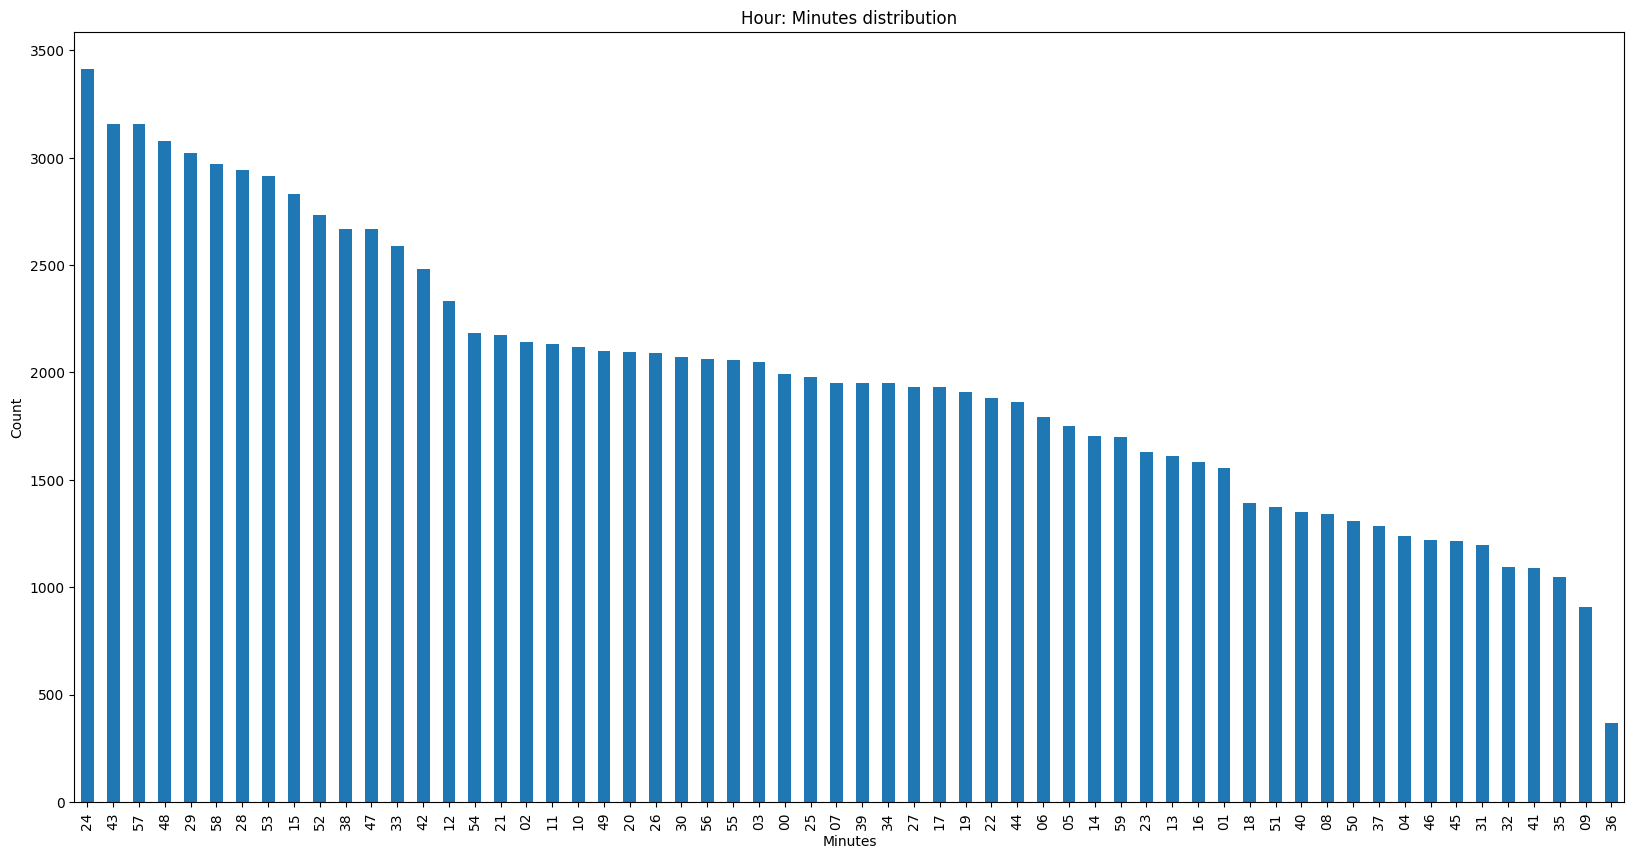

In [ ]:
plt.figure(figsize=(20,10))
df_clean['Hour'].apply(lambda x: x.split(':')[1]).value_counts(sort=True).plot(kind='bar')
plt.xlabel('Minutes')
plt.ylabel('Count') 
plt.title('Hour: Minutes distribution')

[1.0, 214937.0, 67188]


Text(0.5, 1.0, 'Retweets distribution')

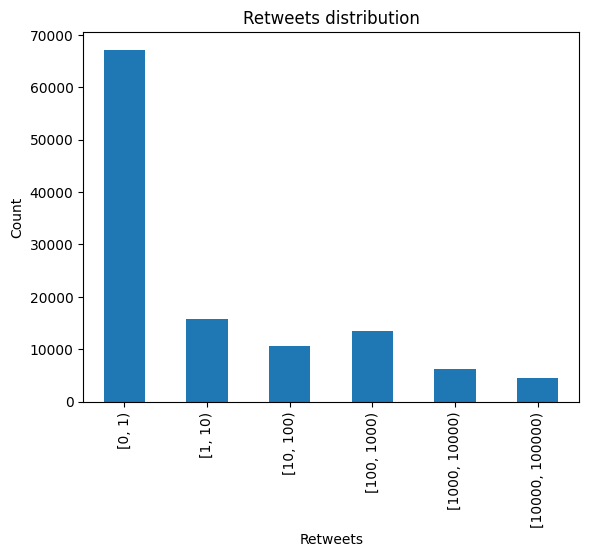

In [ ]:
print([df_clean['Retweets'].min(),df_clean['Retweets'].max(), df_clean['Retweets'].isnull().sum()])
pd.cut(x=df_clean['Retweets'].fillna(0), include_lowest=True, right=False, bins=[0,1,10,100,1000,10000,100000]).value_counts(sort=False).plot.bar()
plt.xlabel('Retweets') 
plt.ylabel('Count') 
plt.title('Retweets distribution') 

[1.0, 5553.0, 114114]


Text(0.5, 1.0, 'Favs distribution')

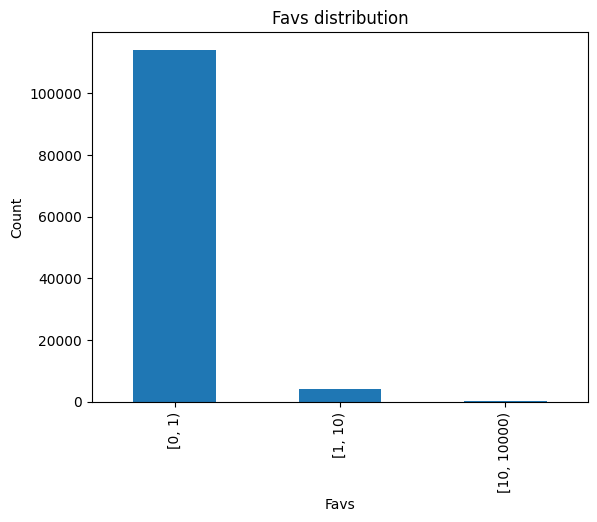

In [ ]:
print([df_clean['Favs'].min(),df_clean['Favs'].max(), df_clean['Favs'].isnull().sum()])
pd.cut(x=df_clean['Favs'].fillna(0), include_lowest=True, right=False, bins=[0,1,10,10000]).value_counts(sort=False).plot.bar()
plt.xlabel('Favs') 
plt.ylabel('Count') 
plt.title('Favs distribution') 

Text(0.5, 1.0, 'Other countries')

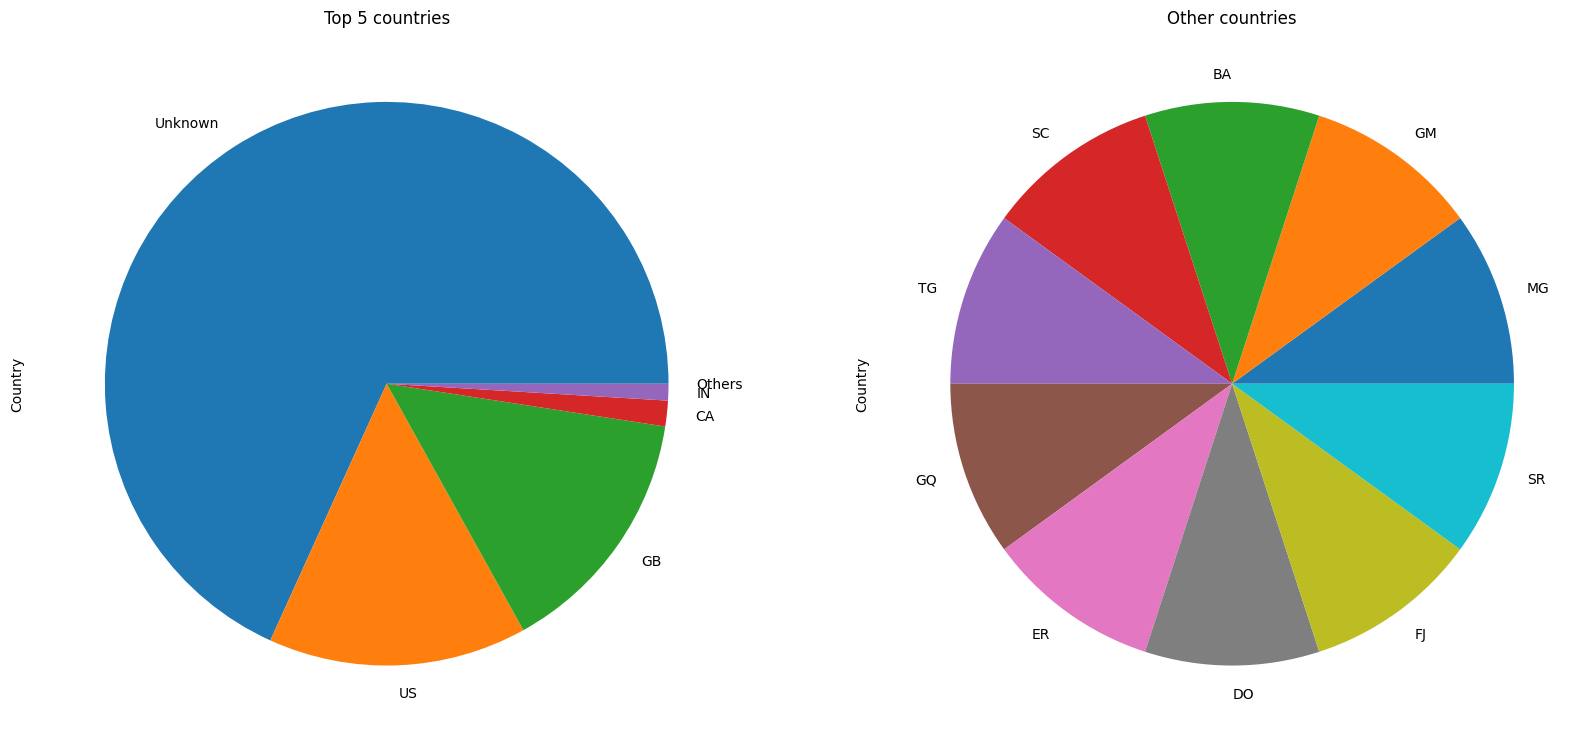

In [ ]:
df_countries = df_clean.copy()
df_countries['Country'].fillna('Unknown', inplace=True)
topN = 5
fig, ax = plt.subplots(1,2, figsize=(20,10))
df_top10 = df_countries['Country'].value_counts().head(topN)
df_top10['Others'] = df_countries['Country'].value_counts().tail(topN).sum()
df_top10.plot.pie(ax=ax[0])
ax[0].set_title('Top {} countries'.format(topN))
df_clean['Country'].value_counts().tail(10).plot.pie(ax=ax[1])
ax[1].set_title('Other countries') 

[1.0, 76342882.0, 1155]


Text(0.5, 1.0, 'Followers distribution')

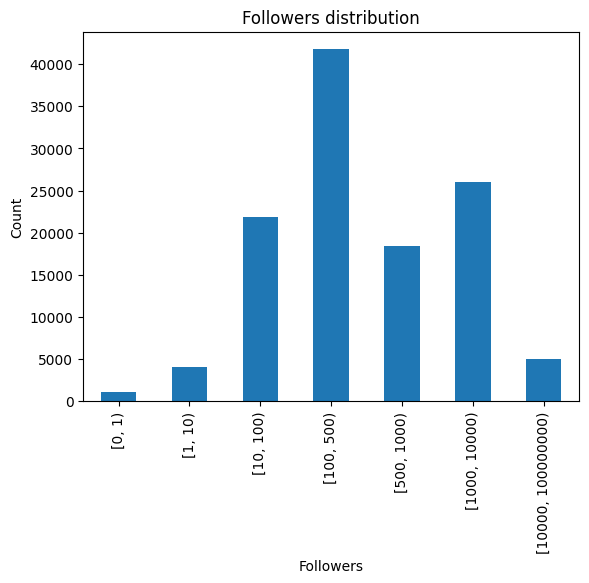

In [ ]:
print([df_clean['Followers'].min(),df_clean['Followers'].max(), df_clean['Followers'].isnull().sum()])
pd.cut(x=df_clean['Followers'].fillna(0), include_lowest=True, right=False, bins=[0,1,10,100,500,1000,10000,100000000]).value_counts(sort=False).plot.bar()
plt.xlabel('Followers') 
plt.ylabel('Count') 
plt.title('Followers distribution') 

[-7.0, 3130269.0, 14736]


Text(0.5, 1.0, 'Following distribution')

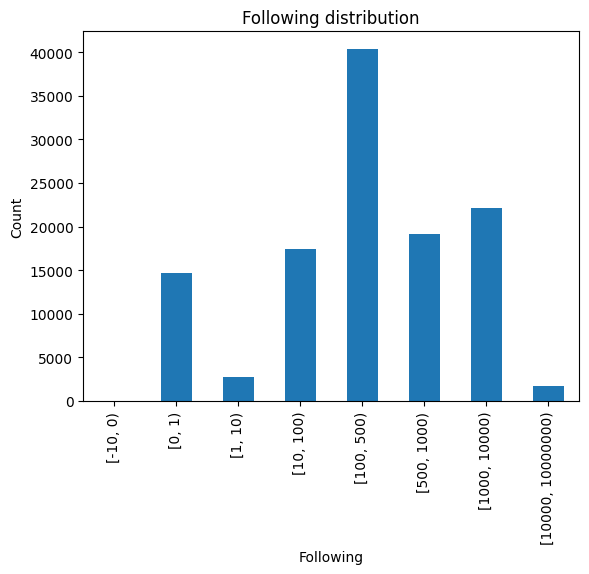

In [ ]:
print([df_clean['Following'].min(),df_clean['Following'].max(), df_clean['Following'].isnull().sum()])
pd.cut(x=df_clean['Following'].fillna(0), include_lowest=True, right=False, bins=[-10,0,1,10,100,500,1000,10000,10000000]).value_counts(sort=False).plot.bar()
plt.xlabel('Following') 
plt.ylabel('Count') 
plt.title('Following distribution') 

In [ ]:
df_clean[df_clean['Following'] < 0]

,Date,Hour,Tweet,Favs,Retweets,Country,Followers,Following,Listed
45881,2016-04-29,02:35,RT @YanyeWest2o1: Eli Apple is HOME!! https://...,NaN,1.0,NaN,15661.0,-5.0,229.0
73683,2016-04-28,23:55,OUT NOW - @KatyB's 'H🍯NEY' featuring the likes...,1.0,NaN,GB,107473.0,-7.0,1435.0


[1.0, 129204.0, 15208]


Text(0.5, 1.0, 'Listed distribution')

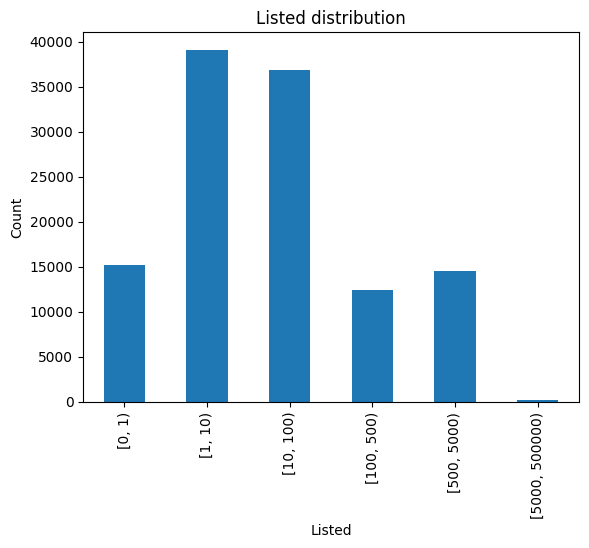

In [ ]:
print([df_clean['Listed'].min(),df_clean['Listed'].max(), df_clean['Listed'].isnull().sum()])
pd.cut(x=df_clean['Listed'].fillna(0), include_lowest=True, right=False, bins=[0,1,10,100,500,5000,500000]).value_counts(sort=False).plot.bar()
plt.xlabel('Listed') 
plt.ylabel('Count') 
plt.title('Listed distribution') 

In [ ]:
df_clean[df_clean['Listed'] > 100000]

,Date,Hour,Tweet,Favs,Retweets,Country,Followers,Following,Listed
2382,2016-04-29,08:22,RT @CalvinHarris: OUT NOW ⚡️⚡️⚡️https://t.co/i...,NaN,1670.0,NaN,76342882.0,245.0,122759.0
9311,2016-04-29,08:00,Apple’s loudest activist investor just dumped ...,10.0,35.0,NaN,6698667.0,798.0,104879.0
73811,2016-04-28,23:54,Obsessed with the 2016 election? Us too. Get u...,63.0,26.0,NaN,24830153.0,1118.0,115079.0
103859,2016-04-28,20:03,Twitter is now a 'news' app in the Apple store...,60.0,67.0,NaN,7003523.0,2835.0,129204.0
120153,2016-04-28,18:01,Apple starts deploying Carekit for health apps...,38.0,37.0,NaN,6698077.0,798.0,104882.0
129028,2016-04-28,16:20,[UPDATED] Body found in conference room at App...,30.0,38.0,NaN,6696584.0,798.0,104873.0
138406,2016-04-28,14:43,The first four apps with Apple CareKit hit the...,36.0,33.0,NaN,7004097.0,2835.0,129198.0
142597,2016-04-28,14:30,"The 2016 election, by the numbers and on the g...",68.0,240.0,NaN,24832896.0,1118.0,115077.0
144147,2016-04-28,14:24,RT @mash_talk: What questions do you have abou...,NaN,3.0,NaN,7002385.0,2835.0,129189.0


In [9]:
# Feature transformation
df = df_clean.copy()

df.drop('Date', axis=1, inplace=True)

df['Retweets'].fillna(0, inplace=True)
df['Favs'].fillna(0, inplace=True)
df['Followers'].fillna(0, inplace=True)
df['Following'].fillna(0, inplace=True)
df['Listed'].fillna(0, inplace=True)

df['Following'] = df['Following'].apply(lambda x: 0 if x < 0 else x)

df['Country'].fillna('Unknown', inplace=True)

df = pd.concat([df, pd.get_dummies(df['Hour'], prefix='Hour')], axis=1)
df.drop('Hour', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['Country'], prefix='Country')], axis=1)
df.drop('Country', axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118355 entries, 0 to 170481
Columns: 636 entries, Tweet to Country_ZW
dtypes: float64(5), object(1), uint8(630)
memory usage: 77.4+ MB


In [10]:
len(df['Tweet'])

118355

In [11]:
from sklearn.preprocessing import Normalizer

df_norm = df.copy()
df_norm.drop('Tweet', axis=1, inplace=True)
df_norm = pd.DataFrame(Normalizer().fit_transform(df_norm), columns=df_norm.columns)
df_norm.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118355 entries, 0 to 118354
Columns: 635 entries, Favs to Country_ZW
dtypes: float64(635)
memory usage: 573.4 MB


In [20]:
from pandas.core.common import random_state
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(stop_words='english', max_features=20000).fit(df['Tweet'])
print(len(bow_transformer.vocabulary_))

20000


In [23]:
from langdetect import detect
top_words = sorted(bow_transformer.vocabulary_, key=lambda x: x[1], reverse=True)[:500]
top_en_words = [word for word in top_words if detect(word) == 'en']
top_en_words[:10]

['fzlbuf7twu',
 'cyberghostios',
 'hypebeast',
 'type',
 'cybersecurity',
 'mybrothanme',
 'typhanieandco',
 'typical',
 'typed',
 'ty_in_stl']

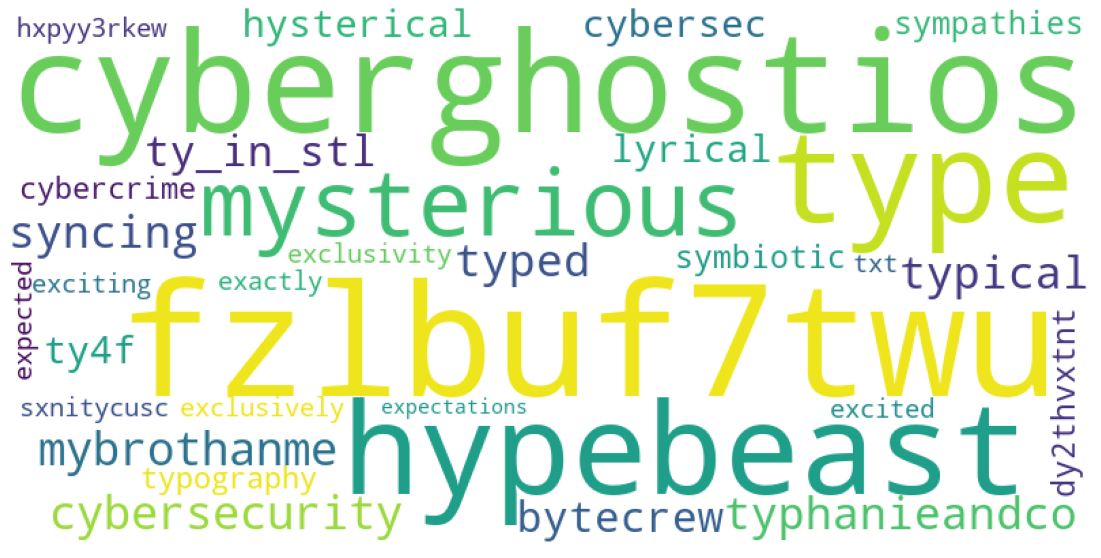

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(' '.join(top_en_words))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# save df_bow to Pandas DataFrame
#df_bow.to_csv('/content/gdrive/MyDrive/ml-course/df_tweets.csv')

# Conclusions

> See kmeans.ipynb and agglomerative.ipynb

The dataset used contains multiple languages, only English Tweets were used based on the Language column. During the data cleaning missing values were replaced and categorical features transformed into a Dummy. The message text was transformed using CountVectorizer, due to a large number of resulting features it was limited to 20K.

Number of clusters: The parameter was chosen using the Mean of 3 methods: Elbow, Silhouette and MeanShift.

Based on Davis-Boulding Index, the Agglomerative model performed best (0.507) compared to K-means (0.497).

Based on top words, it's clear the Tweets message requires special word filtering due to large use of Slangs.